# Images as a functions

Image could be viewed as a function f(x, y), where x, y - pixel coordinate, f - pixels intensity

# Impulse Function and Response

Impulse is:
&nbsp; Discreet: value of 1 at a single location
&nbsp; Continuous: column with a unit area

Response - output on "Black Box" system for impulse input

# Correlation, Cross-correlation, Convolution

Correlation:
![](1_images/correlation.png)

Cross-correlation is a correlation with non-uniform weights
<img src="1_images/cross_correlation.png" width="500">

Convolution is a flipped cross-correlation
<img src="1_images/convolution.png" width="500">
Properties of convolution:
1. Linear and shift invariant
2. Commutative: f*g=g*f
3. Associative (f*g)*h=f*(g*h). If we convolve image of size N*N by kernel of size W*W the computational complexity will be $W^{2}N^{2}$. But instead of kernel of size M*M we could use 2 filters: row and column of size M each and get the same result with complexity $2*WN^{2}$.
4. Identity: f*e=f, where e is a unit impulse, e=[...,0,0,1,0,0,...].
5. Differentiation: d(f*g)/dx = d(f)/dx * g

## Boundaries

Filter application strategies (MatLab nomenclature)
<img src="1_images/boundary_strategies.png" width="500">

Methods to fill border outside of the image:
1. clip - set equal to constant value, usually 0 - 'black'. Problem: constant color licks into image
2. wrap around - bind left to right and top to bottom. Good for periodic signals, not so good for images. Problem: the other side of image licks into.
3. copy edge - fill by closes value of the image. Problem: image statistics get destroyed.
4. reflect across edge - reflects the image at all 4 sides. The best option

# Noise

## Types of noise

<b>Salt and paper noise</b> - random occurrences of black and white pixels
<b>Impulse noise</b> - random occurrences of white pixels>
<b>Gaussian noise</b> - variations in intensity drawn from a Gaussian normal distribution

# Noise filtering

1. <b>Moving averages.</b> Based on assumptions:
1.1 The "true" value of pixels are similar to the true value of pixels nearby
1.2 The noise added to each pixel is done independently
2. <b>Weighted moving averages.</b> Based on assumption: closest pixels have higher weights
    2.1 <b>Gaussian Filter.</b> The most popular type of weighted moving averages. The filter is an approximation of Gaussian function:
   ![](1_images/gaussian.png)
   The sharpness of approximated function is determined by <b>σ</b> parameter (the higher the smoother).
3. <b>Median</b> - replace the pixel by the median of its neighbourhood. Works better when Gaussian Filter if we have low number of noise pixels, or the noise isn't normally distributed. Preserves sharp edges. Drawbacks: it is not differentiable.

# Image sharpening

In [ ]:
import cv2 as cv
import numpy as np
from opencv_.utils import show

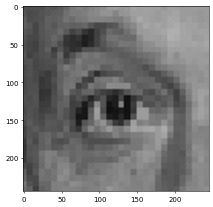

In [5]:
img_original = cv.imread('./1_images/einstein_eye.png', cv.IMREAD_GRAYSCALE)
show(img_original, dpi=50)

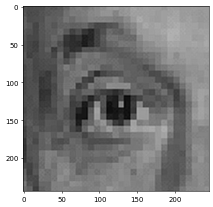

In [4]:
# version 1
average_kernel = np.ones((3, 3), np.float32) / 9
multiply_kernel = np.zeros((3, 3))
multiply_kernel[1, 1] = 2
sharpening_kernel = multiply_kernel - average_kernel # image * 2 - blur

img_sharp = cv.filter2D(img_original, -1, sharpening_kernel)
show(img_sharp, dpi=50)

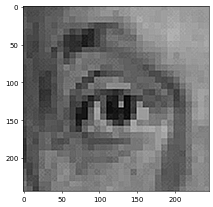

In [9]:
# version 2
sharpening_kernel = np.asarray([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

img_sharp = cv.filter2D(img_original, -1, sharpening_kernel)
show(img_sharp, dpi=50)

# Filter as templates

&nbsp; If we do normalized cross-correlation (normalize image and filter to have 0 mean and 1 std) using template as a filter, we will have maximum value at the point of the best filter match.
&nbsp; This approach is good for detecting objects with fixed shape and scale only and bad for all other cases. It can still works for matching non identical templates, but it is not very reliable.